In [5]:
import numpy as np
import pandas as pd
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


In [4]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
#printing the shapes
print(train_x.shape, train_y.shape)
print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
#normalizing the pixel values of images
train_x = train_x.astype('float32')/255.0
test_x = test_x.astype('float32')/255.0


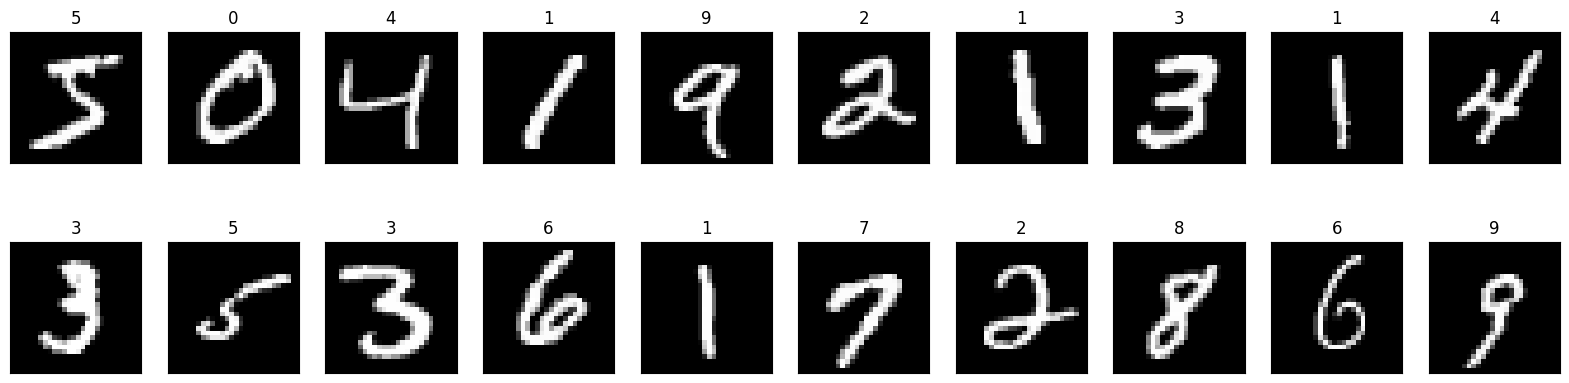

In [8]:
#plotting images of dataset
fig = plt.figure(figsize = (20,5))
for i in range(20):
 ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(train_x[i]), cmap='gray')
 ax.set_title(train_y[i])


In [9]:
shape = train_x.shape[1:]
shape

(28, 28)

In [10]:
#CNN Model
from tensorflow.keras.layers import MaxPooling2D as MaxPool2D
model = Sequential()
#adding convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))


In [11]:
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [ ]:
#compiling model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )
x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

In [ ]:
loss, accuracy= model.evaluate(test_x, test_y, verbose = 0)
print(f'Accuracy: {accuracy*100}')


In [ ]:
model.save(r'final_model.h5')

In [ ]:
# make a prediction for a new image.
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
# load and prepare the image
def load_image(filename):
# load the image
img = load_img(filename, grayscale=True, target_size=(28, 28))
plt.figure(figsize=(5,5))
plt.imshow(img,cmap='gray')
plt.show()
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
return img
# load an image and predict the class
def run_example():
# load the image
img = load_image(r'C:\Users\92341\Desktop\7.png')
# load model
model = load_model(r'C:\Users\92341\Desktop\DipLab\final_model.h5')
# predict the class
predict_value = model.predict(img)
digit = argmax(predict_value)
print('Predicted',digit)
# entry point, run the example
run_example()
